# Iris Flower Classification

<img src="https://storage.googleapis.com/kaggle-media/learn/images/RcxYYBA.png">

### Context

The Iris flower dataset consists of three species: setosa, versicolor,and virginica. These species can be distinguished based on their measurements. Now, imagine that you have the measurements of Iris flowers categorized by their respective species. Your objective is to train a machine learning model that can learn from these measurements and accurately classify the Iris flowers into their respective species.

### Project Objective 

Use the Iris dataset to develop a model that can classify iris
flowers into different species based on their sepal and petal
measurements. This dataset is widely used for introductory
classification tasks.



In [27]:
# Importing Dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [12]:
iris = pd.read_csv(r'C:\Users\Subhajit Nath\Documents\DataSets\Iris Flower Classification\IRIS.csv')

In [37]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [14]:
iris.shape

(150, 5)

In [15]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [17]:
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


## Data Visualization

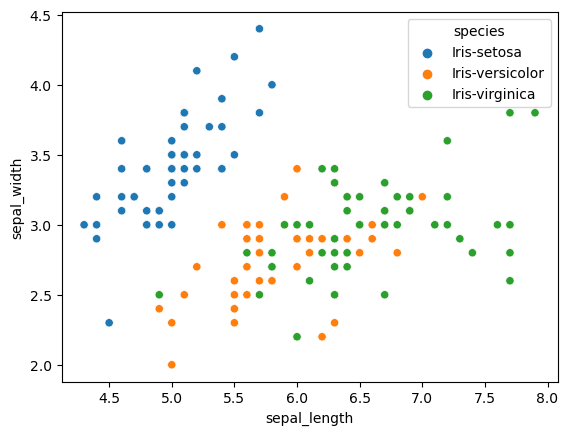

In [24]:
sns.scatterplot(x='sepal_length', y='sepal_width', hue='species', data=iris)
plt.show()

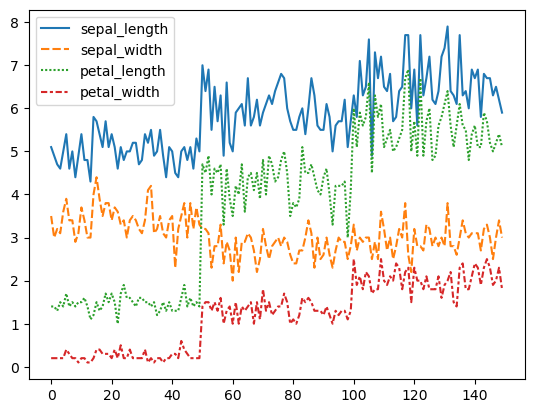

In [25]:
sns.lineplot(data=iris.drop(['species'], axis=1))
plt.show()

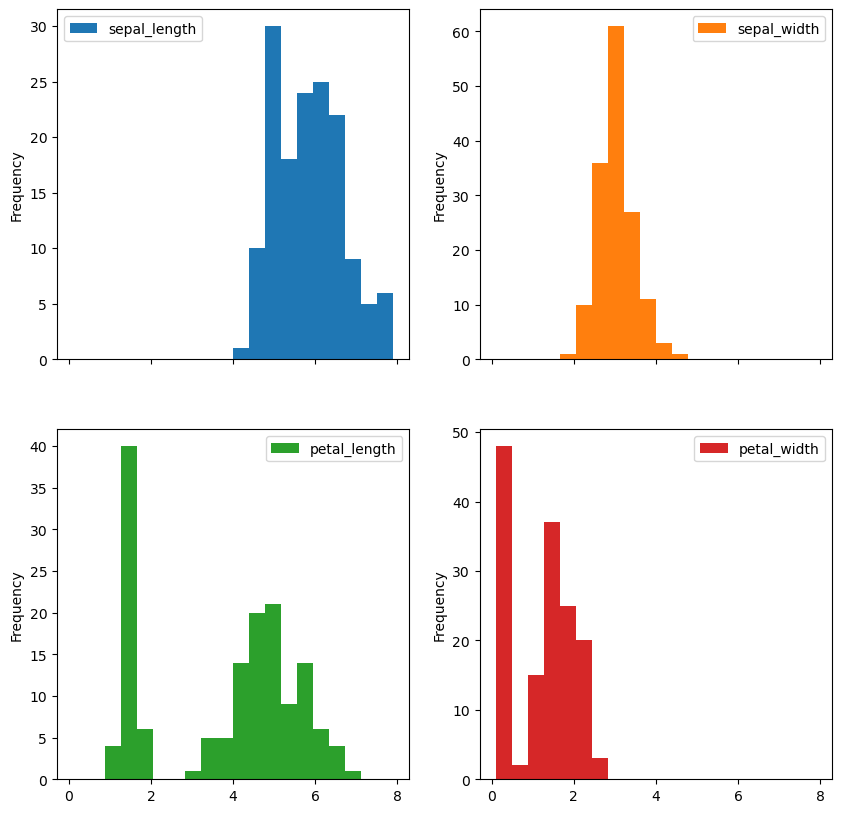

In [22]:
iris.plot.hist(subplots=True, layout=(2,2), figsize=(10, 10), bins=20)
plt.show()

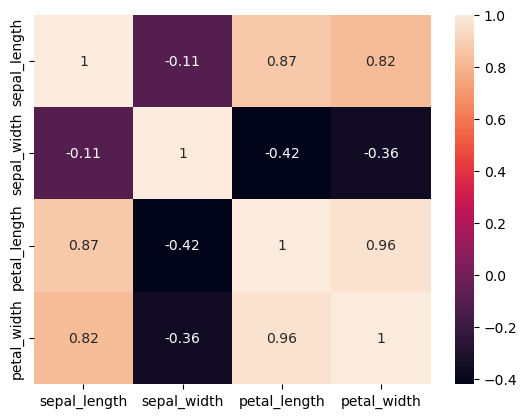

In [29]:
sns.heatmap(iris.corr(), annot=True)
plt.show()

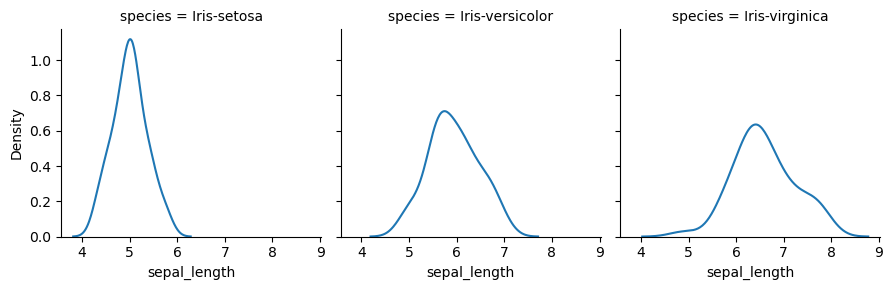

In [30]:
g = sns.FacetGrid(iris, col='species')
g = g.map(sns.kdeplot, 'sepal_length')

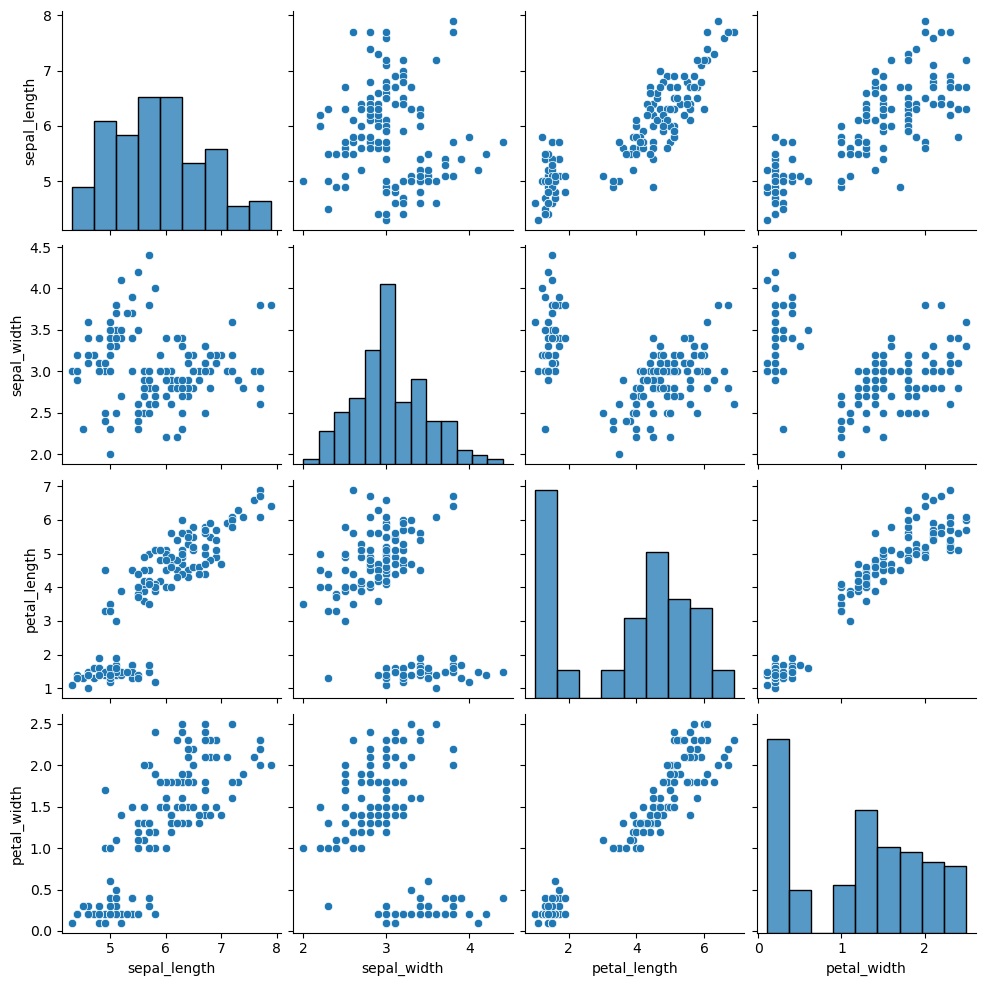

In [34]:
sns.pairplot(iris)

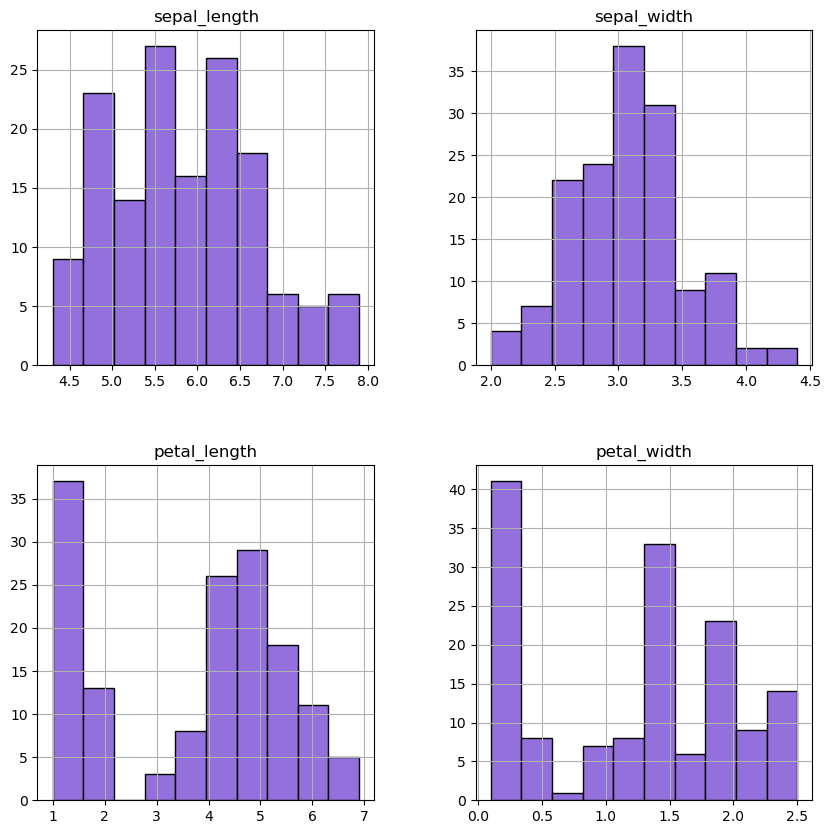

In [35]:
iris.hist(color= 'mediumpurple' ,edgecolor='black',figsize=(10,10))
plt.show()

In [36]:
iris.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.00,-0.11,0.87,0.82
sepal_width,-0.11,1.00,-0.42,-0.36
petal_length,0.87,-0.42,1.00,0.96
petal_width,0.82,-0.36,0.96,1.00


## Machine Learning

In [39]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score

In [40]:
x = iris.drop('species', axis=1)
y= iris.species

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=5)

### <font color="blue"><b>K Neighbors Classifier</b></font>

In [42]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5, p=2, metric='minkowski')
knn.fit(x_train, y_train)

knn.score(x_test, y_test)

0.9666666666666667

### <font color="blue"><b>Logistic Regression</b></font>

In [43]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x, y)
y_pred = logreg.predict(x)
print(metrics.accuracy_score(y, y_pred))

0.9733333333333334


### <font color="blue"><b>SVM</b></font>

In [45]:
from sklearn.svm import SVC
svm = SVC(kernel='rbf', random_state=0, gamma=.10, C=1.0)
svm.fit(x_train, y_train)

svm.score(x_test, y_test)

0.9833333333333333

### <font color="blue"><b>Decision Tree Classifier</b></font>

In [46]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
dtree.fit(x_train, y_train)

dtree.score(x_test, y_test)

0.9666666666666667